<a href="https://colab.research.google.com/github/zubrist/Machine-Learning/blob/main/Q4_Na%C3%AFve_Bayes_(Zoo_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [ ]:
#import dataset
df=pd.read_csv('/content/drive/MyDrive/dataset/zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,Mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,Mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,Fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,Mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,True,False,False,True,False,False,False,True,True,True,False,False,2,True,False,True,Mammal
97,wasp,True,False,True,False,True,False,False,False,False,True,True,False,6,False,False,False,Bug
98,wolf,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,Mammal
99,worm,False,False,True,False,False,False,False,False,False,True,False,False,0,False,False,False,Invertebrate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    bool  
 2   feathers     101 non-null    bool  
 3   eggs         101 non-null    bool  
 4   milk         101 non-null    bool  
 5   airborne     101 non-null    bool  
 6   aquatic      101 non-null    bool  
 7   predator     101 non-null    bool  
 8   toothed      101 non-null    bool  
 9   backbone     101 non-null    bool  
 10  breathes     101 non-null    bool  
 11  venomous     101 non-null    bool  
 12  fins         101 non-null    bool  
 13  legs         101 non-null    int64 
 14  tail         101 non-null    bool  
 15  domestic     101 non-null    bool  
 16  catsize      101 non-null    bool  
 17  Type         101 non-null    object
dtypes: bool(15), int64(1), object(2)
memory usage: 4.0+ KB


**Check for null values**

In [ ]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
Type           0
dtype: int64

**View the shape**

In [ ]:
print("There are {} rows and {} columns.".format(df.shape[0],df.shape[1]))

There are 101 rows and 18 columns.


View the statistical description of the data frame

In [ ]:
df.describe()

,legs
count,101.000000
mean,2.841584
std,2.033385
min,0.000000
25%,2.000000
50%,4.000000
75%,4.000000
max,8.000000


In [ ]:
df['Type'].value_counts()

Mammal          41
Bird            20
Fish            13
Invertebrate    10
Bug              8
Reptile          5
Amphibian        4
Name: Type, dtype: int64

**Visualizations**

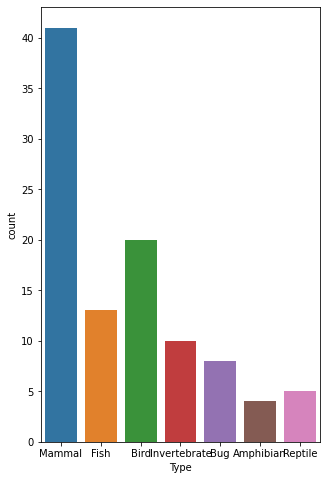

In [ ]:
plt.figure(figsize=(5,8));
sns.countplot(df['Type']);

In [ ]:
hair=df.hair
feathers=df.feathers
eggs=df.eggs
milk=df.milk
legs=df.legs
tail=df.tail
domestic=df.domestic
target=df.Type

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
hair_encoded=le.fit_transform(hair)
feathers_encode=le.fit_transform(feathers)
eggs_encoded=le.fit_transform(eggs)
milk_encoded=le.fit_transform(milk)
legs_encoded=le.fit_transform(legs)
#tail_encoded=le.fit_transform(tail)
domestic_encoded=le.fit_transform(domestic)
target_encoded=le.fit_transform(target)

In [ ]:
print(hair_encoded)
print(feathers_encode)
print(eggs_encoded)
print(milk_encoded)
print(legs_encoded)
print(domestic_encoded)
print(target_encoded)

[1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1
 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1]
[0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0
 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1]
[1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1
 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0]
[2 2 0 2 2 2 2 0 0 2 2 1 0 0 2 4 1 2 0 0 1 1 2 1 4 2 2 1 2 1 4 2 1 1 0 2 2
 1 0 4 4 1 4 1 2 2 4 2 2 2 2 4 2 5 2 2 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 1 5 0
 0 1 0 0 1 1 0 0 0 1 1 3 0

In [ ]:
import numpy as np
zipped=zip(hair_encoded,feathers_encode,eggs_encoded,milk_encoded,legs_encoded,domestic_encoded)
features = np.array(list(zipped)).tolist()
print(features)

[[1, 0, 0, 1, 2, 0], [1, 0, 0, 1, 2, 0], [0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 2, 0], [1, 0, 0, 1, 2, 0], [1, 0, 0, 1, 2, 0], [1, 0, 0, 1, 2, 1], [0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 2, 1], [1, 0, 0, 1, 2, 0], [0, 1, 1, 0, 1, 1], [0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 2, 0], [0, 0, 1, 0, 4, 0], [0, 1, 1, 0, 1, 0], [1, 0, 0, 1, 2, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 1, 1, 0, 1, 1], [0, 1, 1, 0, 1, 0], [1, 0, 0, 1, 2, 0], [0, 1, 1, 0, 1, 0], [0, 0, 1, 0, 4, 0], [0, 0, 1, 0, 2, 0], [0, 0, 1, 0, 2, 0], [1, 0, 0, 1, 1, 0], [1, 0, 0, 1, 2, 0], [1, 0, 0, 1, 1, 1], [0, 0, 1, 0, 4, 0], [1, 0, 0, 1, 2, 1], [1, 0, 0, 1, 1, 0], [0, 1, 1, 0, 1, 0], [0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 2, 1], [1, 0, 0, 1, 2, 0], [0, 1, 1, 0, 1, 0], [0, 0, 1, 0, 0, 0], [1, 0, 1, 0, 4, 1], [1, 0, 1, 0, 4, 0], [0, 1, 1, 0, 1, 0], [0, 0, 1, 0, 4, 0], [0, 1, 1, 0, 1, 0], [1, 0, 0, 1, 2, 0], [1, 0, 0, 1, 2, 0], [0, 0, 1, 0, 4, 0], [1, 0, 0, 1, 2, 0], [1, 0, 0, 1, 2, 0], [1, 0, 0, 1, 2, 0],

**Builing the model**

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import CategoricalNB

In [ ]:
#Create a Gaussian Classifier
model = CategoricalNB()

In [ ]:
# Train the model using the training sets
model.fit(features,target)

CategoricalNB()

In [ ]:
#Predict Output
predicted= model.predict([[1, 1,1,0,2,1]]) # 1:Has hair, 1: Has feathers, 1:eggs, 0:No milk, 2: two leg, 1: Domestic
print("Predicted Value:", predicted)

Predicted Value: ['Amphibian']
